# Voting
- 서로 다른 알고리즘을 가진 분류기를 결합
## Hard Voting
- 다수결
## Soft Voting
- 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 확률이 가장 높은 레이블 값으로 보팅
- 일반적으로 소프트 보팅 사용
## VotingClassfier()
- input : estimators, voting

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

- breast cancer data사용한 예제
- logistic, KNN을 기반으로 한 보팅 분류기

In [2]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
lr = LogisticRegression(solver = 'newton-cg')
knn = KNeighborsClassifier()

vote_clf = VotingClassifier(estimators=[('LR',lr), ('KNN', knn)], voting = 'soft')

X_train ,X_test, y_train ,y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

In [4]:
vote_clf.fit(X_train ,y_train)
pred = vote_clf.predict(X_test)

print('Voting classifer accuracy : {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting classifer accuracy : 0.9561


In [5]:
#개별 모델과의 비교

classifiers = [vote_clf, lr, knn]

for  classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

VotingClassifier 정확도 : 0.9561
LogisticRegression 정확도 : 0.9649
KNeighborsClassifier 정확도 : 0.9035


# Bagging
- Bootstrapping Aggregating
- 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정.
- 각각의 분류기가 같지만, 데이터 샘플링을 서로 다르게 학습
- 데이터 중첩을 허용. 복원 추출(with replacement)

## randomforest
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자으 ㅣ데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정.
- subset dataet 은 부트스트래핑 방식으로 데이터가 임의로 만들어짐
- subset 은 데이터 건수는 전체 데이터 건수와 동일하지만, 중첩되어짐. (with replacement)

### HAR 예제

In [9]:
import os
os.listdir(')

['HAR']

In [10]:
def get_human_dataset() :
    feature_name_df = pd.read_csv('../MLguide/data/HAR/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])
    
    feature_name = feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('../MLguide/data/HAR/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('../MLguide/data/HAR/X_test.txt', sep = '\s+', names = feature_name)
    
    y_train = pd.read_csv('../MLguide/data/HAR/y_train.txt', sep = '\s+', names = ['action'], header = None)
    y_test = pd.read_csv('../MLguide/data/HAR/y_test.txt', sep = '\s+', names = ['action'], header = None)
    
    return X_train, X_test, y_train,y_test

In [11]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

In [12]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('random forest accuracy : {0:.4f}'.format(accuracy))

random forest accuracy : 0.9108


### hyperparameter tuning
- n_estiamtors(default = 10) : 결정 트리의 개수를 지정. 많이 설정할수록 좋은 성능을 기대할 수 있지만, 무조건 향상되는 것은 아님. 학습시간도 오래 걸림
- max_features(default = 'sqrt') : 전체 피처가 아닌 전체 피터 개수의 루트만큼 참조
- max_depth, min_samples_leaf

In [13]:
from sklearn.model_selection import GridSearchCV

In [16]:
params = {
    'n_estimators' : [100,150],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

rf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, n_jobs = -1, )
grid_cv.fit(X_train, y_train)

print('best hyper parameters : ', grid_cv.best_params_)
print('best accuracy {0:.4f} : '.format(grid_cv.best_score_))

best hyper parameters :  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 150}
best accuracy 0.9211 : 


In [22]:
rf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                            min_samples_split=8, random_state=0, n_jobs=-1)

rf1.fit(X_train, y_train)
pred = rf1.predict(X_test)

print('accuracy {0:.4f}'.format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


accuracy 0.9165


In [23]:
rf2 = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8,
                            min_samples_split=8, random_state=0, n_jobs=-1)

rf2.fit(X_train, y_train)
pred = rf2.predict(X_test)

print('accuracy {0:.4f}'.format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


accuracy 0.9199


### features importance

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
grid_cv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 150}

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


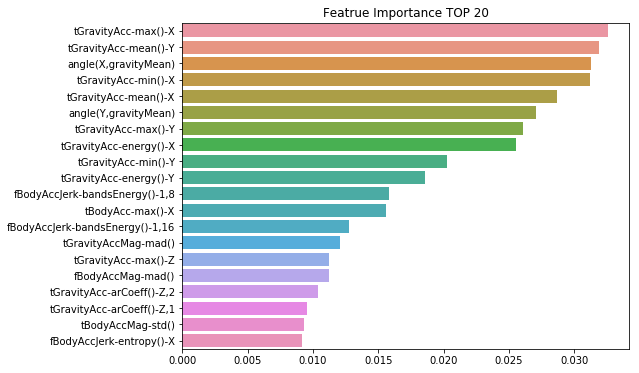

In [28]:
best_rf = RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=8,
                                 n_estimators=150, random_state=0, n_jobs = -1)
best_rf.fit(X_train, y_train)

ftr_importance = pd.Series(best_rf.feature_importances_, index = X_train.columns)
ftr_top20 = ftr_importance.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('Featrue Importance TOP 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

# Boosting
- 여러 개의 분류기를 순차적으로 학습.
- 앞에서 학습한 분류기각 틀렸을 경우, 올바르게 예측할 수 있도록 가중치 부여
- Adaboost, GBM, XGBoost, LightGBM

## GBM
- 일반적으로 GBM이 랜덤포레스트보다 성증이 뛰어나다.
- 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝도 필요하다

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM accuracy : {0:.4f}'.format(gb_accuracy))
print('GBM time : {0} sec'.format(start_time - time.time()))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBM accuracy : 0.9376
GBM time : -106.13451957702637 sec


### hyperparameter tuning
- loss(default : deviance) : loss function 지정.
- learning_rate(default : 0.1) : n_estiamtors와 상호 보완적으로 종합. learning_rate를 작게 하고 , n_estimators를 크게 하면 성능이 좋아지지만, 너무 오래걸림.
- n_estimators(default : 100) : weak learner의 개수
- subsample(default : 1) : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 과적합이 우려되면 1보다 작은 값 사용(0.5이면, 데이터의 절반만 학습한다는 뜻)

In [30]:
from sklearn.model_selection import  GridSearchCV

params = {
    'n_estimators' : [100,500], #the number of weak learners
    'learning_rate' : [0.05,0.1]
    
}

grid_cv = GridSearchCV(gb, param_grid=params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)

print('best hyperparameters : ', grid_cv.best_params_)
print('best accuracy {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d ar

best hyperparameters :  {'learning_rate': 0.1, 'n_estimators': 500}
best accuracy 0.9011


In [31]:
#predict with best hyperparmaeters
gb_pred = grid_cv.best_estimator_.predict(X_test)
print('GBM best accuracy : {0:.4f}'.format(accuracy_score(y_test, gb_pred)))

GBM best accuracy : 0.9403


### xgboost, lightgbm 은 다른 파일로 각각 정리